In [1]:
import xgrads as xgr # módulo que lê os arquivos controle (.ctl) e interpreta os binários usando como base a biblioteca xarray
import xarray as xr

#### Carregando todos os arquivos do ano de 2002

In [2]:
arquivos = xgr.open_mfdataset('C:/MergeINPE/2002/*.ctl')

* os arquivos são lidos como um xarray dataset

In [3]:
arquivos

,Array,Chunk
Bytes,111.96 MB,306.74 kB
Shape,"(365, 313, 245)","(1, 313, 245)"
Count,1095 Tasks,365 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,111.96 MB,306.74 kB
Shape,"(365, 313, 245)","(1, 313, 245)"
Count,1095 Tasks,365 Chunks
Type,float32,numpy.ndarray


#### Cálculo dos acumulados mensais
* Os arquivos foram agrupados pela coordenada time (tempo) de mês a mês: arquivos.groupby('time.month')
* O acumulado de precipitação para cada mês foi calculado: .sum(dim='time')

In [4]:
acumulados_mensais = arquivos.groupby('time.month').sum(dim='time')

* Checando o mês de jan de 2002

In [5]:
acumulados_mensais['prec'].sel(month=1)

<xarray.DataArray 'prec' (lat: 313, lon: 245)>
dask.array<getitem, shape=(313, 245), dtype=float32, chunksize=(313, 245), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -82.8 -82.6 -82.399994 ... -34.19889 -33.998886
  * lat      (lat) float32 -50.2 -50.0 -49.8 ... 11.800236 12.0002365 12.200237
    month    int64 1

In [6]:
acumulados_mensais['prec'].sel(month=1).values

array([[ 50.903397 ,  54.1881   ,  58.3569   , ...,  31.5612   ,
         29.5134   ,  28.6725   ],
       [ 50.903397 ,  54.1881   ,  58.3569   , ...,  31.5612   ,
         29.5134   ,  28.6725   ],
       [ 50.903397 ,  54.1881   ,  58.3569   , ...,  31.5612   ,
         29.5134   ,  28.6725   ],
       ...,
       [194.73988  , 202.9155   , 187.0755   , ...,   2.2104   ,
          1.7142   ,   1.8795   ],
       [188.6505   , 175.63124  , 161.86124  , ...,   2.1044998,
          1.6245   ,   1.8525   ],
       [176.69176  , 160.74449  , 142.2405   , ...,   2.1813   ,
          2.316    ,   2.7029998]], dtype=float32)

In [7]:
acumulados_mensais['prec'].sel(month=1).shape

(313, 245)

In [8]:
acumulados_mensais['prec'].sel(month=1).plot()

#### Cortando o dataset ara a área de interesse
* A imagem acima abrange a América do Sul. Ela será cortada para a minha área de interesse.

In [9]:
latbounds = [-20.3, -10.0]

In [10]:
lonbounds = [-47.6,-42.9]

In [11]:
clip_total = acumulados_mensais.sel(lat=slice(*latbounds), lon=slice(*lonbounds))

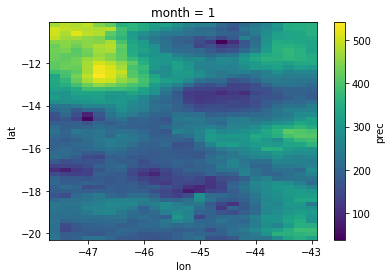

In [12]:
clip_total.prec.sel(month=1).plot()

* O gráfico abaixo apresenta a média da precipitação para toda a área de interesse

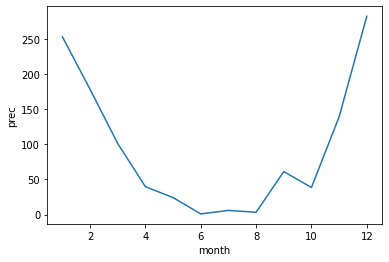

In [13]:
clip_total['prec'].mean(dim=('lat','lon')).plot()

In [14]:
#clip_total.to_netcdf('2002_merge.nc')